 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.columns[whale_df.isnull().any()]
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.columns[whale_df.dropna(inplace=True)]
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns= Path("algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.columns[algo_df.isnull().any()]
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.columns[algo_df.dropna(inplace=True)]
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [10]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [11]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
## Converting `order_total` from `object` to `float`
## Class code: csv_data['order_total'] = csv_data['order_total'].astype('float')
#sp500_df(["Close"]).convert_objects(convert_numeric=True)
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [13]:
algo_df = algo_df.sort_index(ascending = False)
whale_df = whale_df.sort_index(ascending = False)
sp500_df = sp500_df.sort_index(ascending = False)

In [14]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [15]:
# Drop nulls
# YOUR CODE HERE
sp500_df.dropna(inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [16]:
# Rename Column - WHERE I LEFT OFF
# YOUR CODE HERE
sp500_df.rename(columns = {'Close':'S&P500'}, inplace = True)
sp500_df.head()

,S&P500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [17]:
sp500_df = sp500_df.pct_change()
sp500_df

,S&P500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [18]:
sp500_df.dropna(inplace=True)
sp500_df.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")

In [21]:
# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace= True)

In [22]:
# Set column names
combined_df.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'ALGO1', 'ALGO2', 'SP500']

In [23]:
# Display a few rows
combined_df.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

In [24]:
# Calculate Daily Returns
# YOUR CODE HERE
# Note: Data already shown as daily returns

In [25]:
# Drop nulls
# YOUR CODE HERE
# Null values already dropped

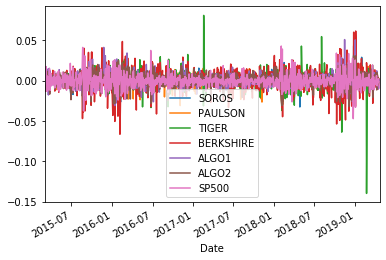

In [27]:
# Plot daily returns
# YOUR CODE HERE
daily_returns = combined_df.plot()

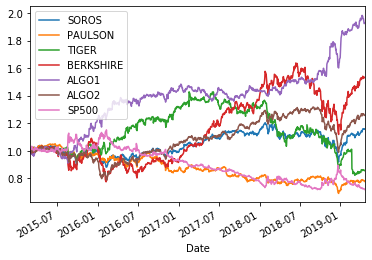

In [30]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

NameError: name 'plt' is not defined

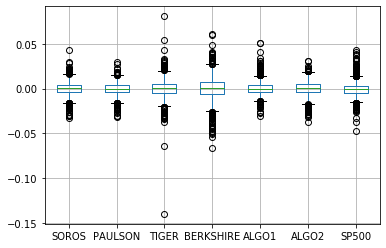

In [38]:
ax == cumulative_returns
ax.boxplot()
plt.show()

In [34]:
# Box plot to visually show risk
# YOUR CODE HERE
volatility = combined_df.std() * np.sqrt(252)
volatility

SOROS        0.125348
PAULSON      0.111527
TIGER        0.172989
BERKSHIRE    0.205079
ALGO1        0.121006
ALGO2        0.132413
SP500        0.136313
dtype: float64

NameError: name 'plt' is not defined

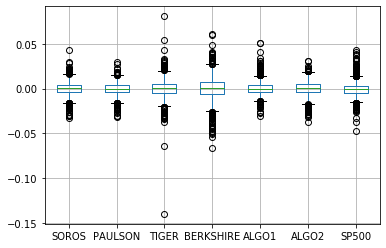

In [39]:
ax == volatility
ax.boxplot()
plt.show()

In [42]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
standard_deviation = combined_df.std()
standard_deviation

SOROS        0.007896
PAULSON      0.007026
TIGER        0.010897
BERKSHIRE    0.012919
ALGO1        0.007623
ALGO2        0.008341
SP500        0.008587
dtype: float64

In [43]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
#Tiger and Berkshire
if standard_deviation >.8 is True
    else is False

SyntaxError: invalid syntax (<ipython-input-43-f2c5aa1203c2>, line 4)

In [41]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_deviation = combined_df.std() * np.sqrt(252)
annualized_deviation

SOROS        0.125348
PAULSON      0.111527
TIGER        0.172989
BERKSHIRE    0.205079
ALGO1        0.121006
ALGO2        0.132413
SP500        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

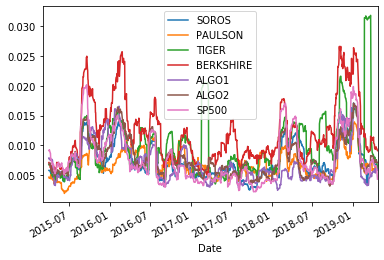

In [45]:
combined_df.rolling(window=21).std().plot()

In [47]:
# Correlation
# YOUR CODE HERE
price_correlation = combined_df.corr()
price_correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500
SOROS,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
ALGO1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
ALGO2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [51]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = combined_df['BERKSHIRE'].cov(combined_df['SP500'])
covariance

-1.5371091324717573e-06

In [52]:
variance = combined_df['SP500'].var()
variance

7.373467552840441e-05

In [53]:
soros_beta = covariance / variance
soros_beta

-0.020846489408902668

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [35]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [36]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [37]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [68]:
# Read the first stock
# YOUR CODE HERE
goog_historical_csv = Path("goog_historical.csv")
goog_historical_df = pd.read_csv(goog_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [69]:
# Read the second stock
# YOUR CODE HERE
cost_historical_csv = Path("cost_historical.csv")
cost_historical_df = pd.read_csv(cost_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [70]:
# Read the third stock
# YOUR CODE HERE
aapl_historical_csv = Path("aapl_historical.csv")
aapl_historical_df = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [71]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
new_combined_df = pd.concat([goog_historical_df, cost_historical_df, aapl_historical_df], axis="columns", join="inner")
new_combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,COST,243.47,AAPL,200.72
2019-05-08,GOOG,1166.27,COST,241.34,AAPL,202.90
2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86
2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75


In [72]:
new_combined_df.drop(columns = ['Symbol'], inplace = True)
new_combined_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,243.47,200.72
2019-05-08,1166.27,241.34,202.90
2019-05-07,1174.10,240.18,202.86
2019-05-06,1189.39,244.23,208.48
2019-05-03,1185.40,244.62,211.75


In [73]:
new_combined_df.columns = ['GOOG', 'COST', 'AAPL']
new_combined_df.head()

,GOOG,COST,AAPL
Trade DATE,,,
2019-05-09,1162.38,243.47,200.72
2019-05-08,1166.27,241.34,202.90
2019-05-07,1174.10,240.18,202.86
2019-05-06,1189.39,244.23,208.48
2019-05-03,1185.40,244.62,211.75


In [74]:
# Reset the index
# YOUR CODE HERE
new_combined_df.sort_index(inplace= True)
new_combined_df.head()

,GOOG,COST,AAPL
Trade DATE,,,
2018-05-11,1098.26,195.76,188.59
2018-05-14,1100.20,195.88,188.15
2018-05-15,1079.23,195.48,186.44
2018-05-16,1081.77,198.71,188.18
2018-05-17,1078.59,199.60,186.99


In [61]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
# Done above

In [75]:
# Drop Nulls
# YOUR CODE HERE
new_combined_df.dropna(inplace=True)
new_combined_df.head()

,GOOG,COST,AAPL
Trade DATE,,,
2018-05-11,1098.26,195.76,188.59
2018-05-14,1100.20,195.88,188.15
2018-05-15,1079.23,195.48,186.44
2018-05-16,1081.77,198.71,188.18
2018-05-17,1078.59,199.60,186.99


# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
all_returns = new_combined_df.pct_change()
all_returns.head()

,GOOG,COST,AAPL
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324


In [94]:
all_returns.dropna(inplace=True)
all_returns.head()

,GOOG,COST,AAPL
Trade DATE,,,
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324
2018-05-18,-0.011339,-0.003206,-0.003637


In [96]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = new_combined_df.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-11    494.203333
2018-05-14    494.743333
2018-05-15    487.050000
2018-05-16    489.553333
2018-05-17    488.393333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# YOUR CODE HERE

In [47]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [48]:
# Risk
# YOUR CODE HERE

In [49]:
# Rolling
# YOUR CODE HERE

In [50]:
# Beta
# YOUR CODE HERE

In [51]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [52]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [53]:
# YOUR CODE HERE